In [66]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
# 2. Data Collection
file_path = "/content/Life Expectancy Data.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (2938, 22)
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         

In [68]:
# 3. Data Cleaning
# Handle missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Drop duplicates
df = df.drop_duplicates()

print("After Cleaning:", df.shape)

After Cleaning: (2938, 22)


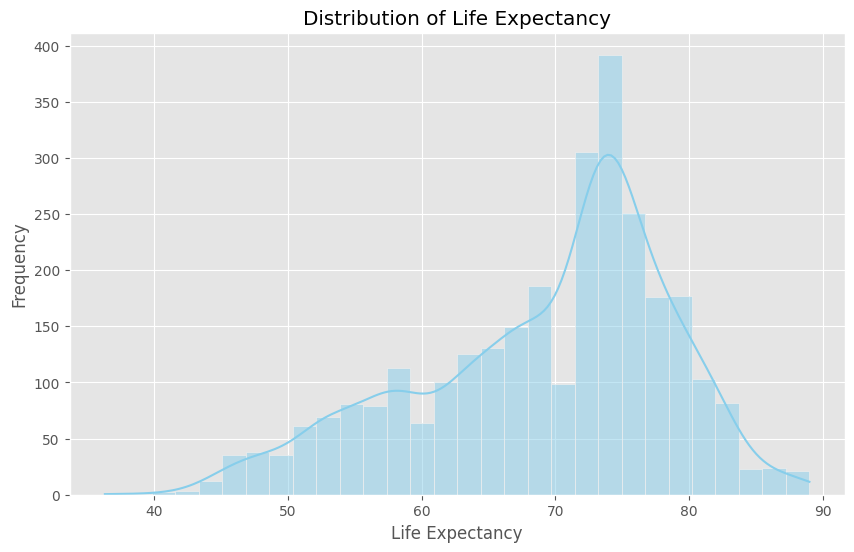

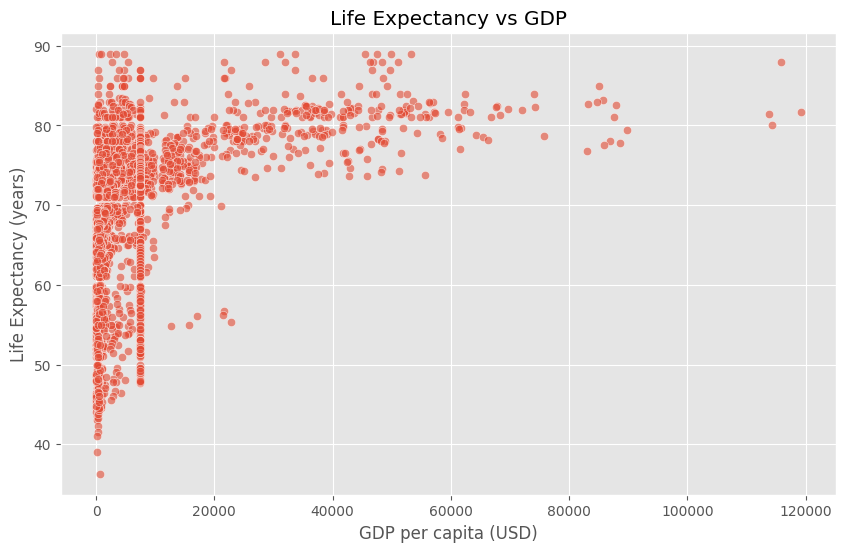

In [69]:
# 4. EDA
# Distribution of life expectancy
plt.figure(figsize=(10,6))
sns.histplot(df['Life expectancy '], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

# Scatter plot GDP vs Life Expectancy
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df, alpha=0.6)
plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life Expectancy (years)")
plt.show()

In [70]:
# 5. Statistical Analysis
# Pearson correlation GDP vs Life Expectancy
gdp_corr, _ = stats.pearsonr(df['GDP'].dropna(), df['Life expectancy '].dropna())
print(f"Correlation between GDP and Life Expectancy: {gdp_corr:.2f}")

# T-test High-income vs Low-income
# Use World Bank income classification if available, else proxy with GDP
if 'Income composition of resources' in df.columns:
    high_income = df[df['Income composition of resources'] > df['Income composition of resources'].median()]['Life expectancy ']
    low_income = df[df['Income composition of resources'] <= df['Income composition of resources'].median()]['Life expectancy ']
    t_stat, p_val = stats.ttest_ind(high_income, low_income)
    print(f"T-test High vs Low Income: t-stat={t_stat:.2f}, p-value={p_val:.4f}")
    if p_val < 0.05:
        print("Statistically significant difference in life expectancy.")
    else:
        print("No statistically significant difference.")

Correlation between GDP and Life Expectancy: 0.43
T-test High vs Low Income: t-stat=50.92, p-value=0.0000
Statistically significant difference in life expectancy.


['country', 'year', 'status', 'life expectancy', 'adult mortality', 'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years', 'thinness 5-9 years', 'income composition of resources', 'schooling']
                            OLS Regression Results                            
Dep. Variable:        life expectancy   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:54:07   Log-Likelihood:                -8995.4
No. Observations:                2938   AIC:                         1.800e+04
Df Residuals:                    2933   BIC:                         1.803e+04
Df Model:            

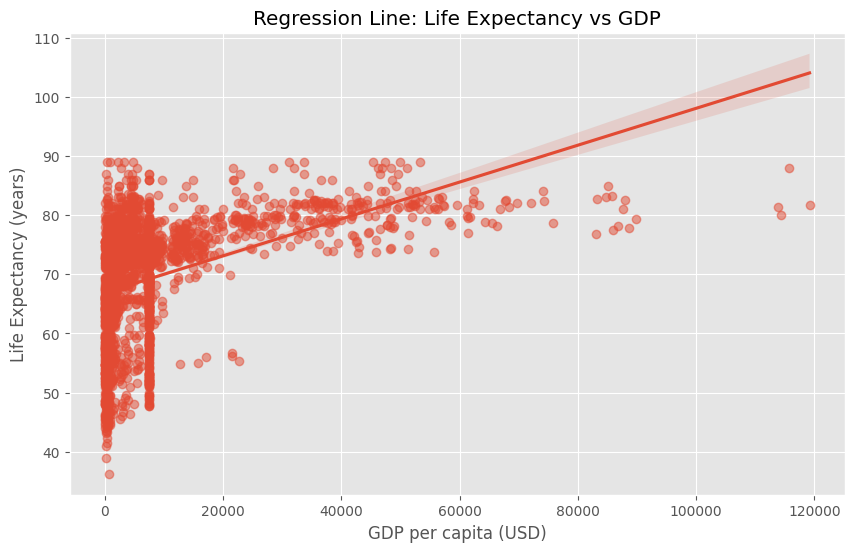

In [71]:
# 1. Clean column names
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())  # optional: check cleaned names

# 2. Regression Analysis
# Features: gdp, total expenditure, schooling, adult mortality
numerical_means = df.select_dtypes(include=np.number).mean()
X = df[['gdp', 'total expenditure', 'schooling', 'adult mortality']].fillna(numerical_means)
y = df['life expectancy']

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# 3. Regression visualization: GDP vs Life Expectancy
plt.figure(figsize=(10,6))
sns.regplot(x='gdp', y='life expectancy', data=df, scatter_kws={'alpha':0.5})
plt.title("Regression Line: Life Expectancy vs GDP")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life Expectancy (years)")
plt.show()